In [ ]:
# Reading data from data file
#import panda as pd
#data_as = pd.read_csv("data_airspace.csv")

from cmath import nan
import numpy as np
import statistics

between_zero_to_five = 0
between_five_to_ten = 0
epsilon = 100

Extracting trajectory data from columns of the data file to corresponding variables

long_1 = data_as.loc[:,"longitude_1"]
lat_1 = data_as.loc[:,"latitude_1"]
alt_1 = data_as.loc[:,"altitude_1"]

long_2 = data_as.loc[:,"longitude_2"]
lat_2 = data_as.loc[:,"latitude_2"]
alt_2 = data_as.loc[:,"altitude_2"]

u_1 = data_as.loc[:,"velocity_u_1"]
v_1 = data_as.loc[:,"velocity_v_1"]
w_1 = data_as.loc[:,"velocity_w_1"]

u_2 = data_as.loc[:,"velocity_u_2"]
v_2 = data_as.loc[:,"velocity_v_2"]
w_2 = data_as.loc[:,"velocity_w_2"]


In [ ]:
long_1 = np.array([0, 6,  4,  8, 8, 10, 14, 10, 14,  4, 4, 6, 9, 15])*10**3
lat_1 =  np.array([4, 6, 10, 11, 7,  6, 10, 10,  6,  0, 3, 4, 3,  6 ])*10**3
alt_1 = np.array([5, 6,  4,  8, 8, 10, 14, 10, 14,  4, 4, 6, 9, 15] )*10**3

long_2 = np.array([0, 9,  8,  8, 8, 10, 4, 10, 24,  7, 4, 16, 9, 5])*10**3
lat_2 = np.array([10, 16, 1, 6, 8,  6, 1, 4,  16,  10, 5, 4, 13,  6])*10**3
alt_2 = np.array([ 5, 9,  8,  8, 8, 10, 4, 10, 24,  7, 4, 16, 9, 5])*10**3



Extracting sector data from columns of the data file to corresponding variables

x_sector = data_as.loc[:,"coordinates_x"]
y_sector = data_as.loc[:,"coordinates_y"]
z_sector = data_as.loc[:,"floor_to_ceiling_height"]


In [ ]:
x=2.1*10**5
y=2.1*10**5
x_sector = np.array([0, x, 0])
y_sector = np.array([0, 0, y])
z_sector = 3048


In [ ]:
# 1_Number of A/C
# we should enumerate number of columns which is = (total number of columns - 3 )/6  [3 is # the columns of sector info, and 6 is 3coordinates and 3 velocities for each A/C]

#No_aircraft = (len(data_as.columns) - 3)/6
No_aircraft = 2

In [ ]:
# 2_Area and volume of the sector
#  Shoelace formula because it is faster
#def PolyArea(x,y):
 #   return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
#area = PolyArea(x_sector,y_sector)
area = x*y/2
volume = area * z_sector

In [ ]:
# 3_A/C density: #A/C / Area of the sector

density = No_aircraft / volume


In [ ]:
# 4_ number of A/C with Heading Change greater than 15º
# Achtung: zero in the denominator of slope[i]
from math import pi

def Heading_change(long,lat):

        delta_long= np.diff(long)+0.00001
        delta_lat=np.diff(lat)
       
        if sum(np.arctan( np.divide(delta_lat,delta_long) )*180/pi > 15)>0:
                return 1
        else:
                return 0


count_Heading_Change = Heading_change(long_1 , lat_1) + Heading_change(long_2 , lat_2)


In [ ]:
# 5_ number of A/C with Altitude Change greater than 750 feet (i.e., 228.6 meter)

def Altitude_Change(alt):
    delta_alt = np.diff(alt)
   
    if sum(delta_alt > 228.6)>0:
        return 1
    else:
        return 0

count_Altitude_Change =  Altitude_Change(alt_1) + Altitude_Change(alt_2)

In [ ]:
# 6_ _ Number of intersecting flight paths i.e., number of A/C with 3D Euclidean distance lower than 'epsilon' meters
# 7_ number of A/C with 3D Euclidean distance between 0-5 nautical miles (i.e., 0-9260 meters)
# 8_ number of A/C with 3D Euclidean distance between 5-10 nautical (i.e., 9260-18520 meters)
diff_long=[]
diff_lat=[]
diff_alt=[]
dist=[]
logical_dist_epsilon=[]
logical_dist_5nm = []
logical_dist_10nm=[]
count_sum_logical_dist_epsilon = 0
def distance(long1,lat1,alt1, long2,lat2,alt2):

        if len(long1)>=len(long2):
            for i in range(len(long1)):
                diff_long = long1[i]-long2[i]
                diff_lat = lat1[i]-lat2[i]
                diff_alt = alt1[i]-alt2[i]
                dist = ((diff_long)**2 + (diff_lat)**2 + (diff_alt)**2)**0.5
                logical_dist_epsilon = dist < epsilon
                print ('logical_dist_epsilon=',logical_dist_epsilon)
                if (dist<9260):
                    print ('logical_dist_5nm=1')
                elif (dist<18520):
                    print ('logical_dist_10nm = 1')

            
        else:
            for i in range(len(long2)):
                diff_long = long1[i]-long2[i]
                diff_lat = lat1[i]-lat2[i]
                diff_alt = alt1[i]-alt2[i]
                dist = ((diff_long)**2 + (diff_lat)**2 + (diff_alt)**2)**0.5
                logical_dist_epsilon = dist < epsilon
                print ('logical_dist_epsilon=',logical_dist_epsilon)
                if (dist<9260):
                    print ('logical_dist_5nm=1')
                elif (dist<18520):
                    print ('logical_dist_10nm = 1')
        
           
distance(long_1,lat_1,alt_1, long_2,lat_2,alt_2)

        

#if sum(dist<9260)>0:
 #   between_zero_to_five = 1
#elif sum(logical_dist_10nm)>0:
 #   between_five_to_ten = 1

9_ number of A/C with lateral distance between 40-70 nautical miles and vertical separation less than 2000/1000 feet above/below 29000 ft

logical_diff_lat_1= abs(diff_lat)>40;
logical_diff_lat_2= abs(diff_lat)>70;
logical_diff_lat=logical_diff_lat_1.*logical_diff_lat_2;

logical_diff_alt_2000=diff_alt<2000;
logical_diff_alt_1000=diff_alt<1000;
logical_alt_below_2900=alt<29000;
logical_alt_above_2900=alt>29000;

Logical_diff2000_and_above=logical_diff_alt_2000.*logical_alt_above_2900;
Logical_diff1000_and_below=logical_diff_alt_1000.*logical_alt_below_2900;

Logical_overall = np.multiply (logical_diff_lat , (Logical_diff2000_and_above + Logical_diff1000_and_below))

counter=0;
if sum(Logical_overall)>0
             counter=counter+1;
end


logical_dist_1 = dist>9260
logical_dist_2 = dist<18520
logical_dist = np.multiply(logical_dist_1,logical_dist_2)

if '1' in logical_dist:
    return 1
else:
    return 0


In [ ]:
# 10_ mean of all aircrafts' altitudes in the sector
def ave_alt(alt1,alt2):
    ave1 = statistics.mean(alt1)
    ave2 = statistics.mean(alt2)
    return (ave1 + ave2)/2

ave_alt(alt_1,alt_2)

11_ mean of variance of all aircrafts' altitudes in the sector
def var_alt(alt1,alt2):
    var1 = statistics.variance(alt1)
    var2 = statistics.variance(alt2)
    return (var1 + var2)/2

var_alt(alt_1,alt_2)

In [ ]:
# Task load number 1: average_transit_time

def ave_tt(long1,long2):
    ave_transit_time1=len(long1)
    ave_transit_time2=len(long2)
    ave_transit_time = (ave_transit_time1 + ave_transit_time2)/2
    return ave_transit_time

ave_tt(long_1,long_2)

In [ ]:
# 2_Total controller's workload
# the following parameters are borrowed from the following paper https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.207.6706&rep=rep1&type=pdf
tau_b= 2
lambda_b= 0.05
tau_t= 10
tau_r= 3
tau_c= 50
P= 300
M_h= 7*1852
M_v= 1000*0.3048
E_v12= 440*0.514444

G = tau_b*lambda_b + tau_t*density*volume/ave_tt(long_1,long_2) + tau_r*density*volume/P + tau_c*2*M_h*M_v*E_v12*density*(density*volume+1)

print ('Workload = ', G)

In [ ]:
print ('volume = ',volume*1.57*(10**-10), 'nm')

In [ ]:
from bluesky import core, stack, traf, scr , settings, navdb, sim, tools

num_ac = traf.ntraf
print(num_ac)

In [6]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
Clat1= 18.405098
Clon1= 98.871728
Clat2= 17.405098
Clon2= 97.871728
Clat3= 13.213485
Clon3= 107.705434
Clat4= 0.88282
Clon4= 97.749317
Clat5= -5.424946
Clon5=  105.420423
Clat6=  -8.517786
Clon6=  117.57994
Clat7=  0.10961
Clon7=  113.336353
Clat8=  0.80143
Clon8=  124.516582
Clat9= 11.300808
Clon9= 123.570896
Clat10=  -2.698363
Clon10=  133.370998
Clat11= 7.434758
Clon11= 134.635915
centers = [ [Clat1, Clon1],[Clat2, Clon2], [Clat3, Clon3], [Clat4, Clon4],[Clat5, Clon5], [Clat6, Clon6], [Clat7, Clon7], [Clat8, Clon8], [Clat9, Clon9],[Clat10, Clon10],[Clat11, Clon11]]

vor = Voronoi(centers)
print()



AttributeError: 'Voronoi' object has no attribute 'simplex'

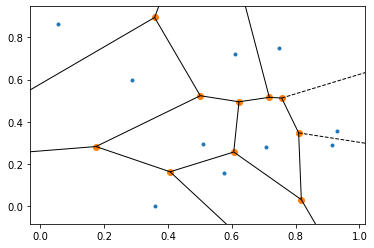

26

In [73]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
points = rng.random((10,2))

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)



np.size(vor.vertices)


In [76]:
while 0:
    print (3)